### Import Modules

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Loading the image

We load the image using `cv2.imread` function:

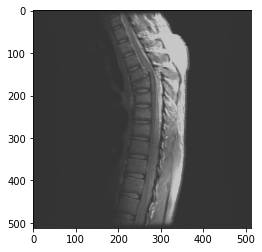

In [18]:
img = cv2.imread('spine.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

### Part 2: Implementing transform function

We need a function to take the image and transformation type and an optional parameter gamma to handle power-law and contrast stretching transformations.

I've used `np.iinfo` to get the maximum value of the image data type. This is used to scale the image to the its original range for the power-law and contrast stretching transformations.

In [19]:
def transform(img, t_name: str, gamma: float = 1):
    '''A function to perform power-law and contrast stretching transformations.
    :param img: The image
    :param t_name str: Name of the transformation (plaw or cstretch)
    :param gamma float: Gamma paramter in contrast stretching
    :return: A new image after performing the transformation 
    '''
    max_value = np.iinfo(img.dtype).max
    new_img = img
    if t_name == 'plaw':
        new_img = max_value * (img / max_value) ** gamma
    elif t_name == 'cstretch':
        new_img = (new_img - new_img.min()) / (new_img.max() - new_img.min()) * max_value
    return new_img.astype(img.dtype)

now we can test the function:

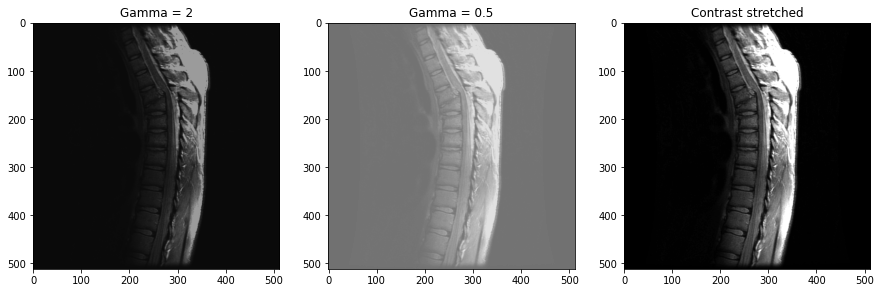

In [20]:
darker_img = transform(img, 'plaw', gamma = 2)
brighter_img = transform(img, 'plaw', gamma = 0.5)
stretched_img = transform(img, 'cstretch')

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(darker_img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Gamma = 2')
ax[1].imshow(brighter_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma = 0.5')
ax[2].imshow(stretched_img, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Contrast stretched');

### Part 3: Implementing two scenarios

In this section, I want to implement two scenarios:

1. Applying power-law transformation to the image with gamma = 0.5 and then contrast stretching.
2. Applying contrast stretching to the image and then power-law transformation with gamma = 0.5.

In [21]:
plaw_image = transform(img, 'plaw', gamma = 0.5)
cstretch_image = transform(img, 'cstretch')
plaw_cstretch_image = transform(plaw_image, 'cstretch')
cstretch_plaw_image = transform(cstretch_image, 'plaw', gamma = 0.5)

### Part 4: Plotting the resulting images

Now we can plot the obtained images:

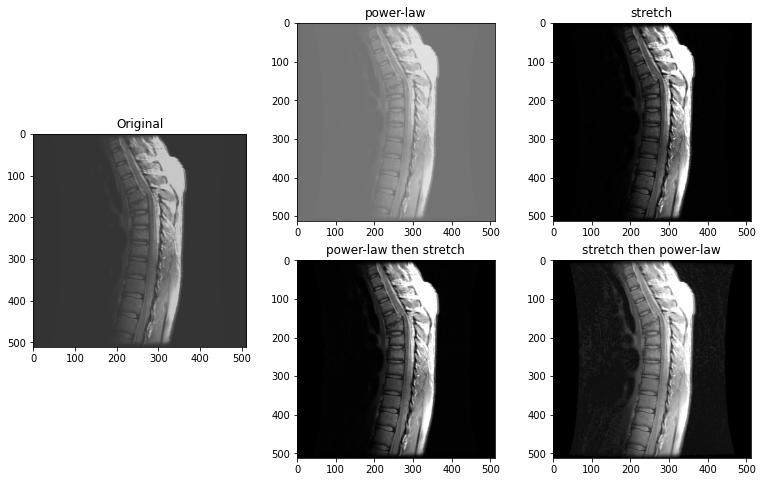

In [22]:
fig = plt.figure(figsize=(13, 8))
gs = fig.add_gridspec(2, 3)

ax_original = fig.add_subplot(gs[:, 0])
ax_original.imshow(img, cmap='gray', vmin=0, vmax=255)
ax_original.set_title('Original')

ax_plaw = fig.add_subplot(gs[0, 1])
ax_plaw.imshow(plaw_image, cmap='gray', vmin=0, vmax=255)
ax_plaw.set_title('power-law')

ax_plaw_cstretch = fig.add_subplot(gs[1, 1])
ax_plaw_cstretch.imshow(plaw_cstretch_image, cmap='gray', vmin=0, vmax=255)
ax_plaw_cstretch.set_title('power-law then stretch')

ax_cstretch = fig.add_subplot(gs[0, 2])
ax_cstretch.imshow(cstretch_image, cmap='gray', vmin=0, vmax=255)
ax_cstretch.set_title('stretch')

ax_cstretch_plaw = fig.add_subplot(gs[1, 2])
ax_cstretch_plaw.imshow(cstretch_plaw_image, cmap='gray', vmin=0, vmax=255)
ax_cstretch_plaw.set_title('stretch then power-law')

plt.show();

### Part 5: Comparing the results

It is good to look at the histograms of the images to compare the results. We can use `cv2.calcHist` function to calculate the histograms of the images.

In [23]:
hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_plaw = cv2.calcHist([plaw_image], [0], None, [256], [0, 256])
hist_cstretch = cv2.calcHist([cstretch_image], [0], None, [256], [0, 256])
hist_plaw_cstretch = cv2.calcHist([plaw_cstretch_image], [0], None, [256], [0, 256])
hist_cstretch_plaw = cv2.calcHist([cstretch_plaw_image], [0], None, [256], [0, 256])

Lets look at the histograms of the images:

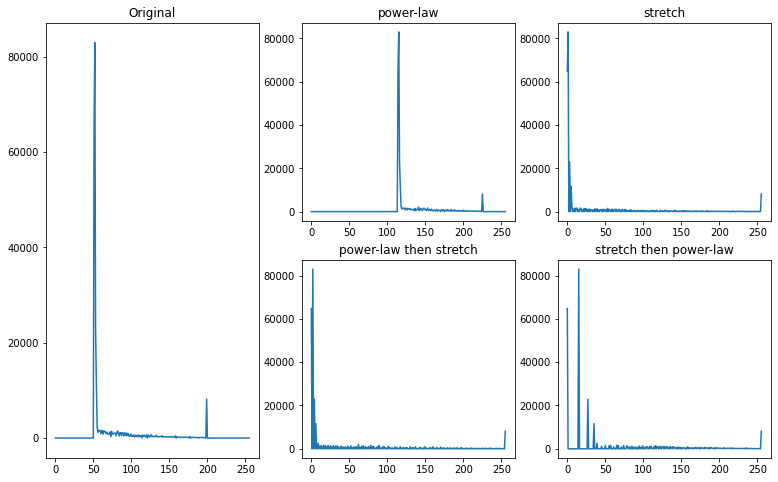

In [24]:
fig = plt.figure(figsize=(13, 8))
gs = fig.add_gridspec(2, 3)

ax_original = fig.add_subplot(gs[:, 0])
ax_original.plot(hist_original)
ax_original.set_title('Original')

ax_plaw = fig.add_subplot(gs[0, 1])
ax_plaw.plot(hist_plaw)
ax_plaw.set_title('power-law')

ax_plaw_cstretch = fig.add_subplot(gs[1, 1])
ax_plaw_cstretch.plot(hist_plaw_cstretch)
ax_plaw_cstretch.set_title('power-law then stretch')

ax_cstretch = fig.add_subplot(gs[0, 2])
ax_cstretch.plot(hist_cstretch)
ax_cstretch.set_title('stretch')

ax_cstretch_plaw = fig.add_subplot(gs[1, 2])
ax_cstretch_plaw.plot(hist_cstretch_plaw)
ax_cstretch_plaw.set_title('stretch then power-law')

plt.show();

From the histograms above we can conclude that:

- Performing `power-law` transformation on the original image, has reduced the contrast of the image. This is because the original image itself has more brighter pixels than darker pixels and fractional power-law transformation amplifies the brightness. This is why the histogram of the image after power-law transformation is shifted to the right.
  
- The images obtained using `contrast stretching after power-law transformation` and `contrast stretching itself` are similar. The only difference is that the image obtained using `contrast stretching after power-law transformation` has few  more brighter pixels and some brighter details has revealed in the image.


- The image constructed with `power-law transformation after contrast stretching` has more details in the background because the power-law transformation with fractional gamma maps a small range of dark pixels to a large range of bright pixels. As a result, the dark background colors are mapped to much brighter colors. This effect can be seen in the histogram of the image.